# Statistics assignment 1

- Mario Damiano Russo 3000437
- Matteo Facchetti 3005019
- Mirko Frigerio 3006305

# NumPy

In [1]:
import numpy as np

In [2]:
np.random.seed(123)
a = np.random.randint(0,10, 5)
a

array([2, 2, 6, 1, 3])

In [3]:
np.random.seed(321)
b = np.random.randint(0, 10, 5)
b

array([4, 9, 8, 1, 8])

## Exercise 1

In [4]:
def innerproduct(x, y):
    if len(x) != len(y):
        raise Exception("The two vectors have different lengths")
    else:
        return np.inner(x, y)
        #we use the numpy function instead of the operators as it is faster
        #nonetheless, no real need to transpose (or use @ instead of *) as y == y.T for any one-dimensional array
        #matrix multiplication properties work for nXm matrices with n, m != 1.

In [5]:
innerproduct(a, b)

99

## Exercise 2

In [6]:
def mae(x, y):
    if len(x) != len(y):
        raise Exception("The two vectors have different lengths")
    return (abs(y - x).sum()) / y.shape[0]

In [7]:
mae(a, b)

3.2

## Exercise 3

In [8]:
def lead(x, n):
    x = x.astype(np.float64)
    return np.append(x[n:], [np.nan] * n)

In [9]:
lead(a, 2)

array([ 6.,  1.,  3., nan, nan])

In [10]:
def lag(x, n):
    x = x.astype(np.float64)
    return np.insert(x[:-n], 0, [np.nan] * n)

In [11]:
lag(a, 2)

array([nan, nan,  2.,  2.,  6.])

## Exercise 4

In [12]:
def distance(m, y):
    if m.shape[1] != len(y):
        raise Exception("The rows of the Matrix differ from the length of the one-dimensional array")
    t = 0
    r = np.empty((0, 0))
    for a in range(m.shape[0]):
        for i in range(m.shape[1]):
            t += (m[a, i] - y[i]) ** 2
            if i == m.shape[1] - 1:
                r = np.append(r, t ** (1/2))
                t = 0
    return r

# slower, two-lines version:
def distance2(m, y):
    r = np.column_stack((m[a, i] - y[i]) ** 2 for a in range(A.shape[0]) for i in range(A.shape[1]))[0]
    return np.column_stack(np.sum(r[i:i + m.shape[1]]) ** (1/2) for i in range(0, r.shape[0], m.shape[1]))

In [13]:
A = np.random.randint(0, 10, (4, 4))
A

array([[8, 4, 5, 8],
       [3, 5, 1, 4],
       [6, 5, 7, 7],
       [2, 2, 3, 9]])

In [14]:
p = np.r_[1:5]
p

array([1, 2, 3, 4])

In [15]:
distance(A, p)

array([8.54400375, 4.12310563, 7.68114575, 5.09901951])

In [16]:
distance(A, p) == distance2(A, p)

array([[ True,  True,  True,  True]])

# Pandas

## Exercise 1

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
%cd /Users/mario/Dropbox/Public/Master/MSc\ Year1/Statistics/Assignment\ 1/nycflights13

/Users/mario/Dropbox/Public/Master/MSc Year1/Statistics/Assignment 1/nycflights13


In [19]:
weather = pd.read_csv("nycflights13_weather.csv", skiprows = 42)

In [20]:
weather.head(6)
#note the missing value for hour 5 of the 1st of January

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00
5,EWR,2013,1,1,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01 07:00:00


In [21]:
# Changing the temperature to Celsius
weather["temp"] = (weather["temp"] - 32) / 1.8

In [22]:
weather.head(2)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00


In [23]:
# for easier and faster manipulation, 
# we create a new jfk dataset containing only the values relative to the JFK airport.
jfk = weather[weather.origin == "JFK"]
jfk.reset_index(inplace = True, drop = True)
jfk.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,JFK,2013,1,1,0,3.3,23.00,54.51,240.0,16.11092,18.540125,0.0,1014.4,10.0,2013-01-01 01:00:00
1,JFK,2013,1,1,1,3.3,24.08,57.04,250.0,17.26170,19.864419,0.0,1013.5,10.0,2013-01-01 02:00:00
2,JFK,2013,1,1,2,3.9,24.98,56.77,240.0,19.56326,22.513008,0.0,1013.0,10.0,2013-01-01 03:00:00
3,JFK,2013,1,1,3,3.9,26.06,59.37,240.0,18.41248,21.188714,0.0,1013.2,10.0,2013-01-01 04:00:00
4,JFK,2013,1,1,4,3.9,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0,2013-01-01 05:00:00


In [24]:
#let's identify each date through a 3-digit code with hour, day and month
#warning is not to be feared: it is just telling that we are modifying a dataframe which is a copy of another dataframe.
jfk[["year", "month", "day", "hour"]] = jfk[["year", "month", "day", "hour"]].astype(str, copy = False)
jfk["timecode"] = jfk.hour + jfk.day + jfk.month
jfk.head()

/Users/mario/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Users/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,timecode
0,JFK,2013,1,1,0,3.3,23.00,54.51,240.0,16.11092,18.540125,0.0,1014.4,10.0,2013-01-01 01:00:00,011
1,JFK,2013,1,1,1,3.3,24.08,57.04,250.0,17.26170,19.864419,0.0,1013.5,10.0,2013-01-01 02:00:00,111
2,JFK,2013,1,1,2,3.9,24.98,56.77,240.0,19.56326,22.513008,0.0,1013.0,10.0,2013-01-01 03:00:00,211
3,JFK,2013,1,1,3,3.9,26.06,59.37,240.0,18.41248,21.188714,0.0,1013.2,10.0,2013-01-01 04:00:00,311
4,JFK,2013,1,1,4,3.9,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0,2013-01-01 05:00:00,411


In [25]:
#let's create a CALENDAR for 2013, with datecodes, in order to fill in the missing observations.
#our aim is to get a dataframe with all the possible dates of 2013, and then merge it with jfk.
#the result will be a dataset which corresponds a temp (or NaN) value to each fay of 2013.
a = pd.date_range(start = "1/1/2013", end = "31/12/2013")
y = np.repeat([int(str(g)[0:4]) for g in a], 24)
m = np.repeat([int(str(g)[5:7]) for g in a], 24)
d = np.repeat([int(str(g)[8:10]) for g in a], 24)
h = list(range(24)) * 365

cal = pd.DataFrame(columns = ["year", "month", "day", "hour", "temp"])
cal.year = y
cal.month = m
cal.day = d
cal.hour = h

#to speed up merging, we identify each day with a timecode in the form of H,D,M.
cal[["year", "month", "day", "hour"]] = cal[["year", "month", "day", "hour"]].astype(str, copy = False)
cal["timecode"] = cal.hour + cal.day + cal.month
cal.head()

,year,month,day,hour,temp,timecode
0,2013,1,1,0,NaN,011
1,2013,1,1,1,NaN,111
2,2013,1,1,2,NaN,211
3,2013,1,1,3,NaN,311
4,2013,1,1,4,NaN,411


In [26]:
#Now append temp values to dataset cal from jfk IF they have matching datecode.
i = 0
j = 0
while j <= jfk.shape[0] - 1:
    if cal.timecode[i] == jfk.timecode[j]:
        cal.temp[i] = jfk.temp[j]
        j += 1
    i += 1

In [27]:
cal.head(6)
#We just filled in all the missing rows! Now we just need to replace the NaNs through interpolation.

,year,month,day,hour,temp,timecode
0,2013,1,1,0,3.3,011
1,2013,1,1,1,3.3,111
2,2013,1,1,2,3.9,211
3,2013,1,1,3,3.9,311
4,2013,1,1,4,3.9,411
5,2013,1,1,5,NaN,511


In [28]:
# *** REMOVE NAN VALUES ***
# Let's prep our dataframe for mean extraction by replacing those NaNs 
# In case the dataset starts or ends with NaN (let's pretend we don't know) we will randomly replace it with a randomly chosen value from the dataset.
# Again, warning. But nothing we should fear.
if pd.isnull(cal.iat[0, 4]):
    cal.iat[0, 4] = cal.temp[np.random.randint(0, cal.shape[0] - 1)]
if pd.isnull(cal.iat[-1, 4]):
    cal.iat[-1, 4] = cal.temp[np.random.randint(0, cal.shape[0] - 1)]

#replace internal NaNs with np.linspace
istart = 0
iend = 0
j = 0
while j <= cal.shape[0] - 1:
    if pd.isnull(cal.iat[j, 4]):
        istart = j
        while pd.isnull(cal.iat[j, 4]):
                j += 1
        iend = j
        cal.iloc[istart - 1:iend + 1, 4] = np.linspace(cal.iat[istart - 1, 4], cal.iat[iend, 4], iend - istart + 2)
    else:
        j += 1

In [29]:
cal.head(7)
#our dataset is finally clean from unobserved values and ready for daily mean computation.

,year,month,day,hour,temp,timecode
0,2013,1,1,0,3.3,011
1,2013,1,1,1,3.3,111
2,2013,1,1,2,3.9,211
3,2013,1,1,3,3.9,311
4,2013,1,1,4,3.9,411
5,2013,1,1,5,3.9,511
6,2013,1,1,6,3.9,611


In [30]:
#but first, we need to convert the dtype of "year", "month", "day", and "temp" back to integer.
cal[["year", "month", "day", "temp"]] = cal[["year", "month", "day", "temp"]].astype(int, copy = False)

In [33]:
#we use the groupby function to ccompute daily averages.
mean_temps = cal.groupby(["year", "month", "day"]).mean()
#and here are the average daily temperatures throughout 2013, with interpolated missing values.
mean_temps.head()

temp
year month day          
2013 1     1    3.208333
           2   -1.666667
           3   -0.875000
           4    0.958333
           5    2.291667

In [34]:
# And now, let's plot the daily means
mean_temps["dayofyear"] = list(range(366))[1:]
sns.set()
y = mean_temps.temp
x = mean_temps.dayofyear

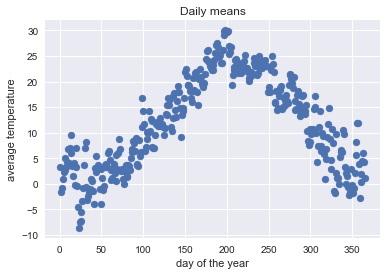

In [35]:
plt.scatter(x, y)
plt.xlabel('day of the year')
plt.ylabel('average temperature')
plt.title("Daily means");

In [36]:
#days hotter than the previous
i = 0
l = []
while i <= mean_temps.shape[0] - 1:
    if mean_temps.iloc[i, 0] > mean_temps.iloc[i - 1, 0]:
        l.append(mean_temps.iloc[i])
    i += 1
hotterdays = pd.DataFrame(l)
hotterdays.head()

,temp,dayofyear
"(2013, 1, 1)",3.208333,1.0
"(2013, 1, 3)",-0.875000,3.0
"(2013, 1, 4)",0.958333,4.0
"(2013, 1, 5)",2.291667,5.0
"(2013, 1, 6)",2.666667,6.0


In [37]:
#5 hottest days
hottest5 = mean_temps.sort_values(by=['temp'], ascending = False).head()
hottest5

temp  dayofyear
year month day                      
2013 7     17   30.041667        198
           16   29.958333        197
           20   29.833333        201
           18   29.791667        199
           19   29.625000        200

## Exercise 2

In [38]:
flights = pd.read_csv("nycflights13_flights.csv", skiprows = 54)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [39]:
# Select between year and day (inclusive)
year_day = flights.loc[:,'year':'day']
year_day.head()

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1


In [40]:
# All columns but between year and day included
a = flights.loc[:, "year":"day"]
notyear_day = flights.drop(a, axis=1)
notyear_day.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


## Exercise 3

In [41]:
%cd /Users/mario/Dropbox/Public/Master/MSc\ Year1/Statistics/Assignment\ 1

/Users/mario/Dropbox/Public/Master/MSc Year1/Statistics/Assignment 1


In [42]:
A = pd.read_csv("some_birth_dates1.csv")
B = pd.read_csv("some_birth_dates2.csv")
C = pd.read_csv("some_birth_dates3.csv")

In [43]:
A_indexed = A.set_index("Name")
B_indexed = B.set_index("Name")
C_indexed = C.set_index("Name")

In [44]:
# Intersection
AIB = pd.merge(A_indexed, B_indexed, on="Name", how="inner")
AIB

,BirthDate_x,BirthDate_y
Name,,
Micha Kitchen,17.09.1930,17.09.1930
Mefodiy Shachar,01.10.1914,01.10.1914
Paul Meckler,29.09.1968,29.09.1968
Katarzyna Lasko,20.10.1971,20.10.1971
Åge Trelstad,07.03.1935,07.03.1935
Duchanee Panomyaong,19.06.1952,19.06.1952


In [45]:
# Intersection - 2
AIC = pd.merge(A_indexed, C_indexed, on="Name", how="inner")
AIC

,BirthDate_x,BirthDate_y
Name,,


In [46]:
# Union
AUB = pd.merge(A_indexed, B_indexed, on="Name", how = 'outer')
AUB

,BirthDate_x,BirthDate_y
Name,,
Paitoon Ornwimol,26.06.1958,NaN
Antónia Lata,20.05.1935,NaN
Bertoldo Mallozzi,17.08.1972,NaN
Nedeljko Bukv,19.12.1921,NaN
Micha Kitchen,17.09.1930,17.09.1930
Mefodiy Shachar,01.10.1914,01.10.1914
Paul Meckler,29.09.1968,29.09.1968
Katarzyna Lasko,20.10.1971,20.10.1971
Åge Trelstad,07.03.1935,07.03.1935


In [47]:
# Union - 2
AUBUC = pd.merge(AUB, C_indexed, on = "Name", how = 'outer')
AUBUC

,BirthDate_x,BirthDate_y,BirthDate
Name,,,
Paitoon Ornwimol,26.06.1958,NaN,NaN
Antónia Lata,20.05.1935,NaN,NaN
Bertoldo Mallozzi,17.08.1972,NaN,NaN
Nedeljko Bukv,19.12.1921,NaN,NaN
Micha Kitchen,17.09.1930,17.09.1930,NaN
Mefodiy Shachar,01.10.1914,01.10.1914,NaN
Paul Meckler,29.09.1968,29.09.1968,NaN
Katarzyna Lasko,20.10.1971,20.10.1971,NaN
Åge Trelstad,07.03.1935,07.03.1935,NaN


In [48]:
# Difference
diff_AB = pd.concat([A_indexed, B_indexed])
AB_dropped = diff_AB.drop_duplicates(keep=False)
AB_difference = pd.merge(AB_dropped, A, on="Name", how="inner")
AB_difference_indexed = AB_difference.set_index("Name")
AB_difference_indexed

,BirthDate_x,BirthDate_y
Name,,
Paitoon Ornwimol,26.06.1958,26.06.1958
Antónia Lata,20.05.1935,20.05.1935
Bertoldo Mallozzi,17.08.1972,17.08.1972
Nedeljko Bukv,19.12.1921,19.12.1921
